<a href="https://colab.research.google.com/github/Jaquees/Sinais-e-Sistemas---LaPlace/blob/main/Sinais_e_Sistemas_Trabalho_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite os coeficientes do numerador separados por espaços: 2 5
Digite os coeficientes do denominador separados por espaços: 2 5 8
Função de Transferência:
TransferFunctionContinuous(
array([1. , 2.5]),
array([1. , 2.5, 4. ]),
dt: None
)


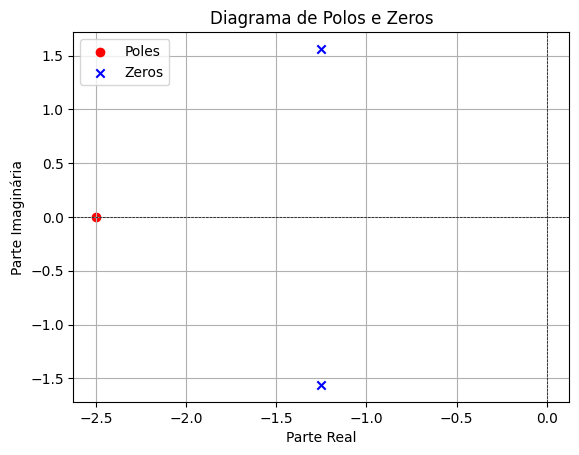

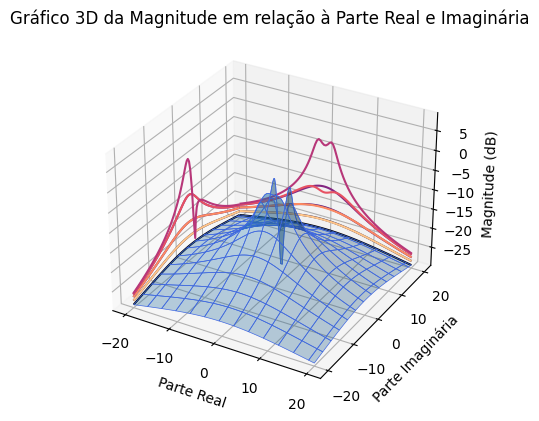

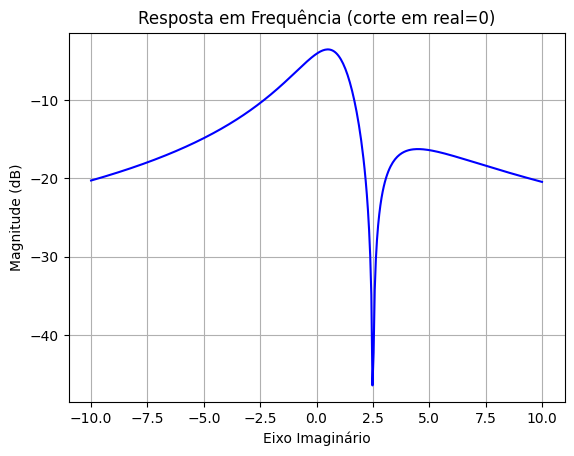

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm, cbook
from matplotlib.ticker import LinearLocator

# Função para plotar o diagrama de polos e zeros
def plot_poles_and_zeros(system):
    poles, zeros, ganho = signal.tf2zpk(system.num, system.den)
    plt.figure()
    plt.scatter(np.real(poles), np.imag(poles), marker='o', color='red', label='Poles')
    plt.scatter(np.real(zeros), np.imag(zeros), marker='x', color='blue', label='Zeros')
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title('Diagrama de Polos e Zeros')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar o gráfico 3D da magnitude da função de transferência
def plot_magnitude_3d(system):
    poles, zeros, ganho = signal.tf2zpk(system.num, system.den)

    # Defina os limites para as partes real e imaginária
    real_limits = (-20, 20)  # Defina os limites apropriados
    imag_limits = (-20, 20)  # Defina os limites apropriados

    # Crie uma grade de valores para as partes real e imaginária
    num_points = 100  # Número de pontos na grade
    real_values = np.linspace(real_limits[0], real_limits[1], num_points)
    imag_values = np.linspace(imag_limits[0], imag_limits[1], num_points)
    real_grid, imag_grid = np.meshgrid(real_values, imag_values)

    # Calcule a magnitude para cada ponto na grade
    mag = np.zeros_like(real_grid)
    for i in range(num_points):
        for j in range(num_points):
            s = complex(real_grid[i, j], imag_grid[i, j])
            _, h = signal.freqresp(system, s)
            mag[i, j] = 20 * np.log10(np.abs(h))

    # Crie o gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(real_grid, imag_grid, mag, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
    ax.contour(real_grid, imag_grid, mag, zdir='x', offset=-20, cmap='magma')
    ax.contour(real_grid, imag_grid, mag, zdir='y', offset=20, cmap='magma')
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginária')
    ax.set_zlabel('Magnitude (dB)')
    ax.set_title('Gráfico 3D da Magnitude em relação à Parte Real e Imaginária')
    plt.show()

# Função para plotar o gráfico 2D com o corte no plano s=0
def plot_s_plane(system):
    s_imaginary = np.linspace(-10, 10, 400)  # Valores da parte imaginária
    s_complex = 1j * s_imaginary  # Crie números complexos com a parte imaginária
    H = signal.TransferFunction(system.num, system.den)
    w, h = signal.freqresp(H, s_complex)

    plt.figure()
    plt.plot(s_imaginary, 20 * np.log10(abs(h)), 'b')
    plt.title('Resposta em Frequência (corte em real=0)')
    plt.xlabel('Eixo Imaginário')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.show()

# Solicite ao usuário os coeficientes da função de transferência
num = input("Digite os coeficientes do numerador separados por espaços: ").split()
den = input("Digite os coeficientes do denominador separados por espaços: ").split()

# Converta os coeficientes para listas de floats
num = [float(x) for x in num]
den = [float(x) for x in den]

# Crie o sistema de transferência
system = signal.TransferFunction(num, den)

# Imprima a função de transferência
print("Função de Transferência:")
print(system)


# Chame as funções para plotar os gráficos
plot_poles_and_zeros(system)
plot_magnitude_3d(system)
plot_s_plane(system)
